# Q2 – Genre Probability Visualizations

This notebook visualizes the output of **Q2**:

> Given a user's genre history, what is the predicted probability of each genre they will watch next?

It expects a CSV with (at least) the columns:
- `user_id`
- `genre_name`
- `genre_count`
- `genre_probability`

The notebook produces three plots:
1. Stacked horizontal bar chart for a sample of users.
2. Heatmap (users × genres).
3. Histogram (bar chart) of the most probable genre per user across all users.


## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline


## 2. Load Q3 genre probability data

In [2]:
q3_path = Path('../data/Q3_results.csv') 

df_q3 = pd.read_csv(q3_path)

required_cols = {'user_id', 'genre_name', 'genre_count', 'genre_probability'}
if not required_cols.issubset(df_q3.columns):
    raise ValueError(f'Q3 CSV must contain columns {required_cols}, got: {df_q3.columns.tolist()}')

print('Rows:', len(df_q3))
print('Users:', df_q3['user_id'].nunique())
print('Genres:', df_q3['genre_name'].nunique())

Rows: 115396
Users: 7045
Genres: 20


## 3. Stacked horizontal bar chart – sample users

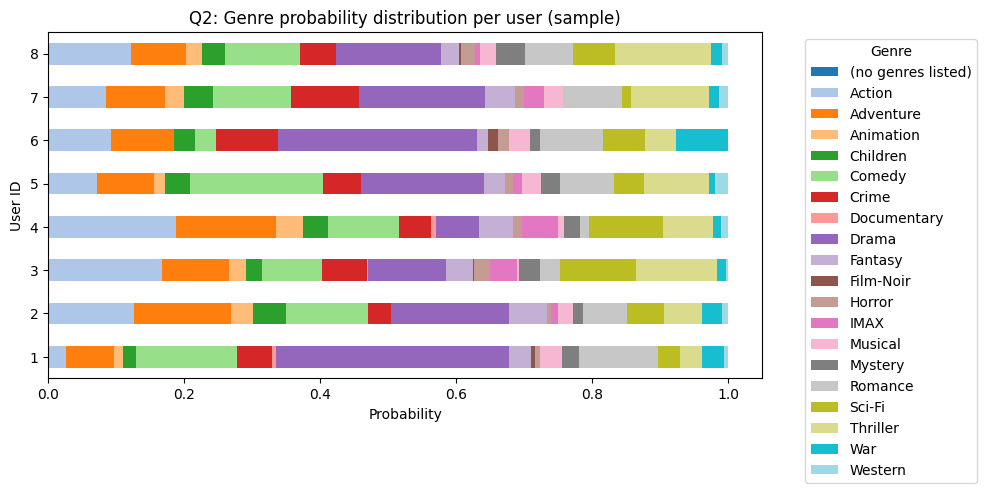

In [4]:
import matplotlib.pyplot as plt

N_USERS_SAMPLE = 8

users_sample = df_q3['user_id'].drop_duplicates().sort_values().head(N_USERS_SAMPLE)
df_sample = df_q3[df_q3['user_id'].isin(users_sample)].copy()

pivot_sample = df_sample.pivot_table(
    index='user_id',
    columns='genre_name',
    values='genre_probability',
    fill_value=0
)

# One distinct color per genre
n_genres = pivot_sample.shape[1]
cmap = plt.get_cmap('tab20')        # up to 20 distinct-ish colors
colors = [cmap(i) for i in range(n_genres)]

ax = pivot_sample.plot(
    kind='barh',
    stacked=True,
    figsize=(10, max(4, N_USERS_SAMPLE * 0.6)),
    color=colors
)

ax.set_xlabel('Probability')
ax.set_ylabel('User ID')
ax.set_title('Q2: Genre probability distribution per user (sample)')
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 4. Heatmap – users × genres

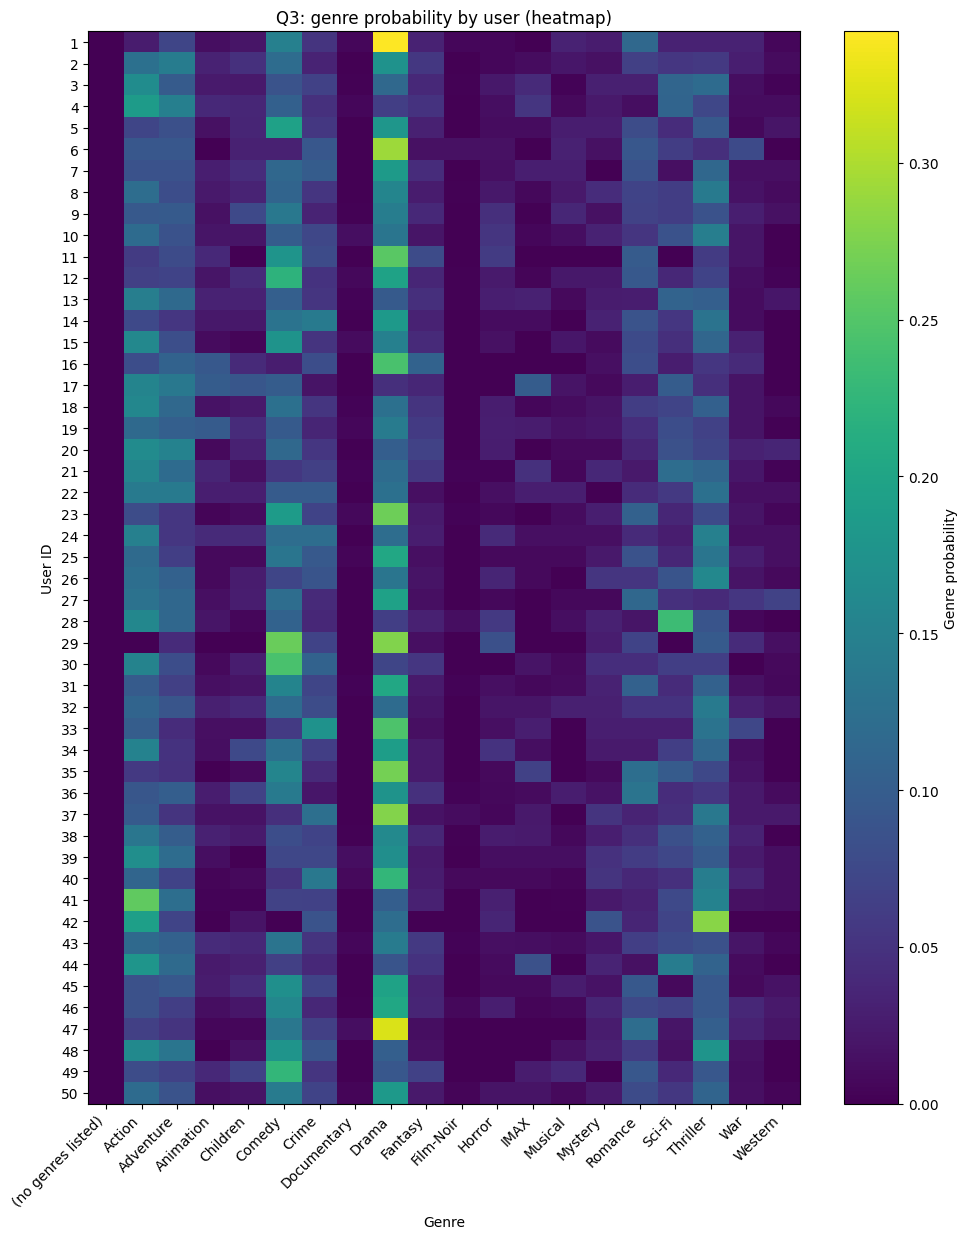

In [4]:
N_USERS_HEATMAP = 50

users_hm = df_q3['user_id'].drop_duplicates().sort_values().head(N_USERS_HEATMAP)
df_hm = df_q3[df_q3['user_id'].isin(users_hm)].copy()

pivot_hm = df_hm.pivot_table(
    index='user_id',
    columns='genre_name',
    values='genre_probability',
    fill_value=0
)

plt.figure(figsize=(10, max(4, len(pivot_hm.index) * 0.25)))
im = plt.imshow(pivot_hm.values, aspect='auto')
plt.colorbar(im, label='Genre probability')
plt.xticks(range(pivot_hm.shape[1]), pivot_hm.columns, rotation=45, ha='right')
plt.yticks(range(pivot_hm.shape[0]), pivot_hm.index)
plt.xlabel('Genre')
plt.ylabel('User ID')
plt.title('Q3: genre probability by user (heatmap)')
plt.tight_layout()
plt.show()

## 5. Histogram of most probable genres across all users

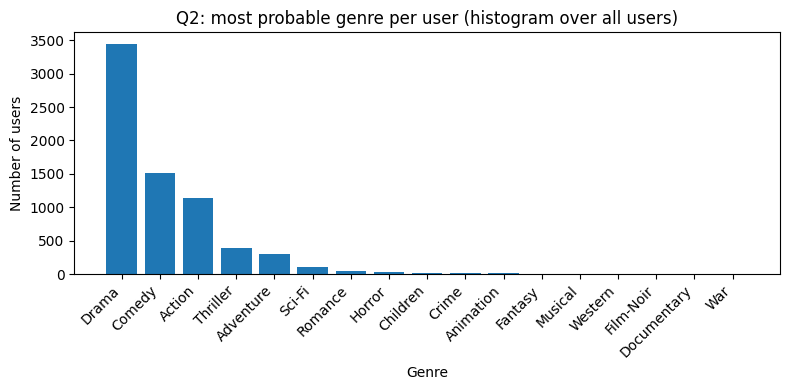

In [5]:
top_genre_per_user = (
    df_q3
    .sort_values(['user_id', 'genre_probability'], ascending=[True, False])
    .groupby('user_id')
    .head(1)
)

counts = (
    top_genre_per_user
    .groupby('genre_name')['user_id']
    .nunique()
    .reset_index(name='n_users')
    .sort_values('n_users', ascending=False)
)

plt.figure(figsize=(8, 4))
plt.bar(counts['genre_name'], counts['n_users'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Number of users')
plt.title('Q2: most probable genre per user (histogram over all users)')
plt.tight_layout()
plt.show()